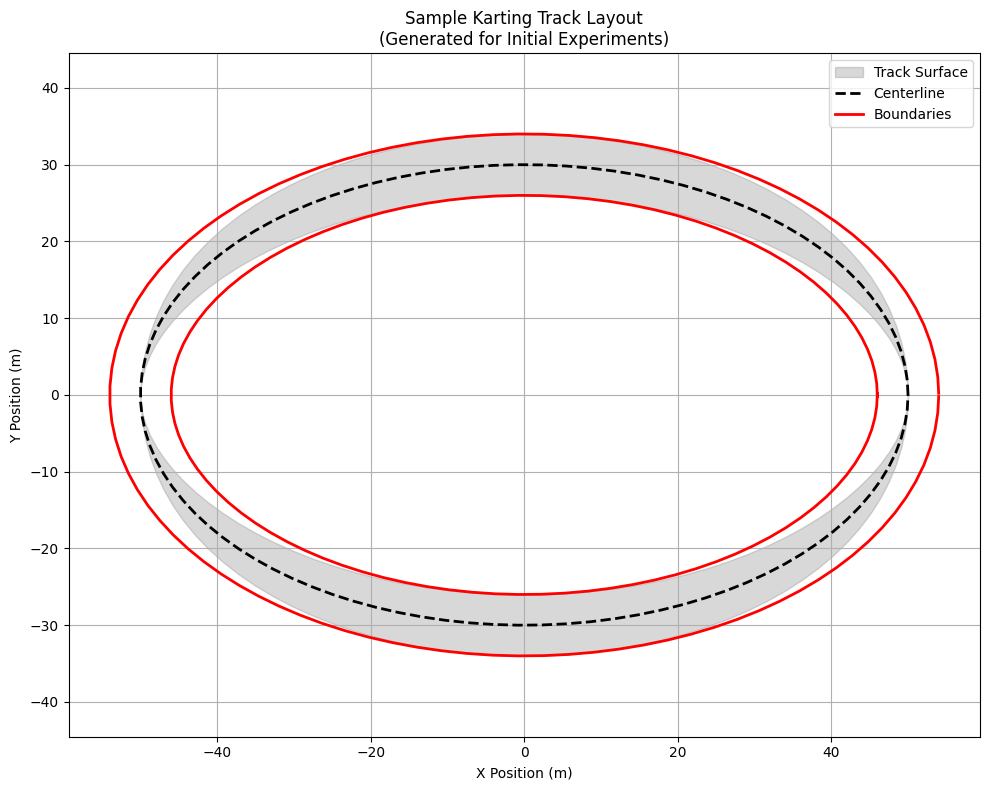

✓ Step 1 Complete: Track geometry generated and visualized


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# STEP 1: CREATE NASCAR-STYLE OVAL TRACK
# ==========================================

def create_nascar_oval():
    """
    Generate a proper NASCAR-style oval track with straights and semicircular ends
    """
    # Track parameters (meters)
    straight_length = 200      # Length of straight sections
    turn_radius = 50           # Radius of turns
    track_width = 12           # Standard NASCAR track width
    
    # Generate points for the centerline
    # Right straight (bottom)
    t_straight = np.linspace(0, 1, 50)
    right_straight_x = straight_length/2 - t_straight * straight_length
    right_straight_y = np.full_like(right_straight_x, -turn_radius)
    
    # Left turn (semicircle)
    t_turn = np.linspace(-np.pi/2, np.pi/2, 50)
    left_turn_x = np.full_like(t_turn, -straight_length/2) - turn_radius * np.cos(t_turn)
    left_turn_y = turn_radius * np.sin(t_turn)
    
    # Left straight (top)
    left_straight_x = -straight_length/2 + t_straight * straight_length
    left_straight_y = np.full_like(left_straight_x, turn_radius)
    
    # Right turn (semicircle)
    t_turn2 = np.linspace(np.pi/2, 3*np.pi/2, 50)
    right_turn_x = np.full_like(t_turn2, straight_length/2) - turn_radius * np.cos(t_turn2)
    right_turn_y = turn_radius * np.sin(t_turn2)
    
    # Combine all sections
    center_x = np.concatenate([right_straight_x, left_turn_x, left_straight_x, right_turn_x])
    center_y = np.concatenate([right_straight_y, left_turn_y, left_straight_y, right_turn_y])
    
    # Calculate normals for boundary generation
    dx = np.gradient(center_x)
    dy = np.gradient(center_y)
    norm = np.sqrt(dx**2 + dy**2)
    nx, ny = -dy/norm, dx/norm  # Normal vectors (perpendicular to direction)
    
    # Inner and outer boundaries (offset by track width)
    inner_x = center_x - nx * track_width/2
    inner_y = center_y - ny * track_width/2
    outer_x = center_x + nx * track_width/2
    outer_y = center_y + ny * track_width/2
    
    return {
        'center_x': center_x, 'center_y': center_y,
        'inner_x': inner_x, 'inner_y': inner_y,
        'outer_x': outer_x, 'outer_y': outer_y,
        'track_width': track_width
    }

track = create_nascar_oval()

# Visualize the track properly
plt.figure(figsize=(14, 8))

# Create filled track surface using polygon
# Combine outer boundary and reversed inner boundary to make a closed polygon
track_x = np.concatenate([track['outer_x'], track['inner_x'][::-1]])
track_y = np.concatenate([track['outer_y'], track['inner_y'][::-1]])

plt.fill(track_x, track_y, color='gray', alpha=0.3, label='Track Surface')
plt.plot(track['center_x'], track['center_y'], 'k--', linewidth=2, label='Centerline')
plt.plot(track['inner_x'], track['inner_y'], 'k-', linewidth=2, label='Boundaries')
plt.plot(track['outer_x'], track['outer_y'], 'k-', linewidth=2)

plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.title('NASCAR-Style Oval Track Layout\n(200m Straights, 50m Turn Radius)')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('track_layout.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Step 1 Complete: NASCAR oval track generated")
print(f"  - Straight length: 200m")
print(f"  - Turn radius: 50m")
print(f"  - Track width: {track['track_width']}m")